## Regularization(정칙화)
- 오버피팅(overfitting)을 해결하기 위한 방법 중의 하나입니다. 
- L1, L2 Regularization, Dropout, Batch normalization 등이 있습니다. 
- regularization 기법들은 모델에 제약 조건을 걸어서 모델의 train loss를 증가시키는 역할
-  train loss는 약간 증가하지만 결과적으로, validation loss나 최종 test loss를 감소시키려는 목적

## Normalization(정규화)
- 이는 데이터의 형태를 좀 더 의미 있게, 혹은 트레이닝에 적합하게 전처리하는 과정
- 데이터를 z-score로 바꾸거나 minmax scaler를 사용하여 0과 1사이의 값으로 분포를 조정하는 것들이 해당됩니다.
- normalization은 모든 피처 값의 범위를 동일하게 하여 모델이 풀어야 하는 문제를 좀 더 간단하게 바꾸어 주는 전처리 과정입니다.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 
import matplotlib.pyplot as plt

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
target_df = pd.DataFrame(data=iris.target, columns=['species'])

# 0, 1, 2로 되어있는 target 데이터를 
# 알아보기 쉽게 'setosa', 'versicolor', 'virginica'로 바꿉니다 
def converter(species):
    if species == 0:
        return 'setosa'
    elif species == 1:
        return 'versicolor'
    else:
        return 'virginica'

target_df['species'] = target_df['species'].apply(converter)

iris_df = pd.concat([iris_df, target_df], axis=1)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
X = [iris_df['petal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']
Y = [iris_df['sepal length (cm)'][a] for a in iris_df.index if iris_df['species'][a]=='virginica']

print("petal length(꽃잎 길이)", X)
print("sepal length(꽃받침의 길이)", Y)

petal length(꽃잎 길이) [6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1]
sepal length(꽃받침의 길이) [6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9]


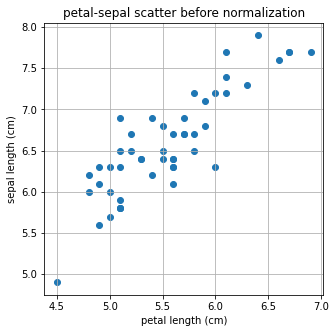

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.title('petal-sepal scatter before normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

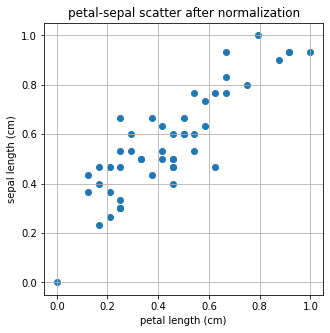

In [4]:
from sklearn.preprocessing import minmax_scale

X_scale = minmax_scale(X)
Y_scale = minmax_scale(Y)

plt.figure(figsize=(5,5))
plt.scatter(X_scale,Y_scale)
plt.title('petal-sepal scatter after normalization') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

In [5]:
from sklearn.linear_model import LinearRegression
import numpy as np 

X = np.array(X)
Y = np.array(Y)

# Iris Dataset을 Linear Regression으로 학습합니다. 
linear= LinearRegression()
linear.fit(X.reshape(-1,1), Y)

# Linear Regression의 기울기와 절편을 확인합니다. 
a, b=linear.coef_, linear.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" %(a,b))

기울기 : 1.00, 절편 : 1.06


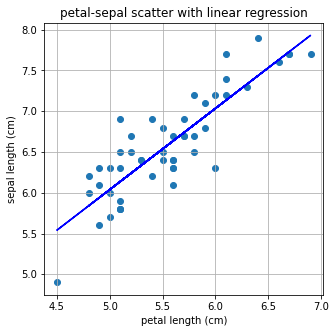

In [6]:
plt.figure(figsize=(5,5))
plt.scatter(X,Y)
plt.plot(X,linear.predict(X.reshape(-1,1)),'-b')
plt.title('petal-sepal scatter with linear regression') 
plt.xlabel('petal length (cm)')
plt.ylabel('sepal length (cm)')
plt.grid()
plt.show()

기울기 : 0.37, 절편 : 4.42


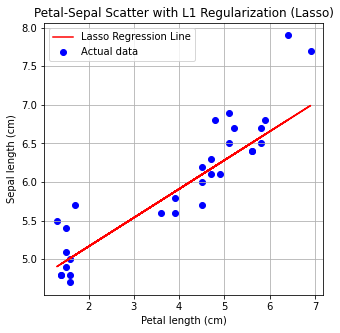

In [9]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 데이터 로드 및 준비
data = load_iris()
X = data.data[:, 2].reshape(-1, 1)  # 꽃잎 길이 (petal length)
y = data.data[:, 0]  # 꽃받침 길이 (sepal length)

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 정규화 (Lasso) 모델 생성 및 훈련
L1 = Lasso(alpha=0.1)  # alpha는 정규화 강도
L1.fit(X_train, y_train)

# 기울기와 절편 가져오기
a, b = L1.coef_[0], L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" % (a, b))

# 예측
y_pred = L1.predict(X_test)

# 시각화
plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='blue', label='Actual data')  # 실제 데이터
plt.plot(X_test, y_pred, color='red', label='Lasso Regression Line')  # Lasso 회귀선
plt.title('Petal-Sepal Scatter with L1 Regularization (Lasso)') 
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.legend()
plt.grid()
plt.show()


기울기 : 0.37, 절편 : 4.42


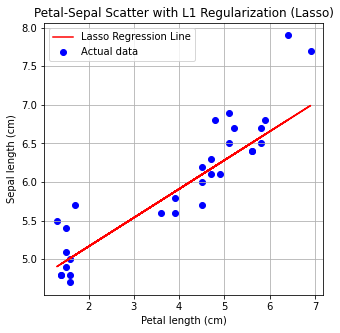

In [11]:
# 필요한 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# 데이터 로드 및 준비
data = load_iris()
X = data.data[:, 2].reshape(-1, 1)  # 꽃잎 길이 (petal length)
y = data.data[:, 0]  # 꽃받침 길이 (sepal length)

# 훈련 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# L1 정규화 (Lasso) 모델 생성 및 훈련
L2 = Ridge(alpha=0.1)  # alpha는 정규화 강도
L2.fit(X_train, y_train)

# 기울기와 절편 가져오기
a, b = L1.coef_[0], L1.intercept_
print("기울기 : %0.2f, 절편 : %0.2f" % (a, b))

# 예측
y_pred = L1.predict(X_test)

# 시각화
plt.figure(figsize=(5,5))
plt.scatter(X_test, y_test, color='blue', label='Actual data')  # 실제 데이터
plt.plot(X_test, y_pred, color='red', label='Lasso Regression Line')  # Lasso 회귀선
plt.title('Petal-Sepal Scatter with L1 Regularization (Lasso)') 
plt.xlabel('Petal length (cm)')
plt.ylabel('Sepal length (cm)')
plt.legend()
plt.grid()
plt.show()


### 5-3 L1 Regularization(Lasso) 정의
$$
\hat{\beta}^{\text{lasso}} := \arg \min_{\beta} \left\{ \frac{1}{2N} \sum_{i=1}^{N} \left( y_i - \beta_0 - \sum_{j=1}^{D} x_{ij} \beta_j \right)^2 + \lambda \sum_{j=1}^{D} |\beta_j| \right\}
$$

$ \lambda \sum_{j=1}^{D} |\beta_j| $
- 이 부분이 없다면 linear regression과 동일합니다.
>💡참고 지식 (Lp norm) <br>
> norm은 벡터나 행렬, 함수 등의 거리를 나타내는 것으로 우리는 여기서 벡터값만 다룰 예정입니다. Lp norm 의 정의는 아래와 같습니다. (참고) Norm (mathematics)